<h1> Test Technique Alternance Data Scientist </h1>

<h2> Randy TCHUISSEU </h2>

<h3> Importations et Traitement des données</h3>

Imports

In [178]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from datetime import datetime, timedelta

In [267]:
# Fonctions
from os import getcwd, chdir, listdir

In [268]:
getcwd()

'C:\\Users\\pc\\Downloads\\Test technique alternance 2024'

In [225]:
# données
conso = pd.read_csv('pdl_1.csv',encoding='utf-8-sig', sep = ',')

conso_2 = pd.read_csv('pdl_2.csv',encoding='utf-8-sig', sep = ',')

#conso22 = pd.read_csv('pdl_1.csv',encoding='utf-8-sig', sep = ',', nrows = 52560,header = 0)
#conso23 = pd.read_csv('pdl_1.csv',encoding='utf-8-sig', sep = ',', skiprows = 52560,header = 0)

#conso22_2 = pd.read_csv('pdl_1.csv',encoding='utf-8-sig', sep = ',', nrows = 52560,header = 0)
#conso22_2 = pd.read_csv('pdl_1.csv',encoding='utf-8-sig', sep = ',', skiprows = 52560,header = 0)

#conso22.shape[0]

Prétraitement des données

In [348]:
def preprocess(data:pd.DataFrame):
    data['time'] = pd.to_datetime(data['timestamp'],errors= 'coerce', format='%Y-%m-%d %H:%M:%S%z',utc =True) \
        + timedelta(hours=1)
    data['month'] = data['time'].dt.strftime('%m')
    data['day'] = data['time'].dt.strftime('%Y-%m-%d')
    data['heure'] = data['time'].dt.strftime('%H:%M:%S')
    data['value'] = data['value'].astype(float)
    data22 = data[data['time'].dt.year ==2022]
    data23 = data[data['time'].dt.year ==2023]
    return data22, data23

In [417]:
conso22_2, conso23_2 = preprocess(conso_2)
conso22, conso23 = preprocess(conso)

In [270]:
conso22.head()

,timestamp,value,time,month,day
0,2022-01-01 00:00:00+01:00,4.0,2022-01-01 00:00:00+00:00,01,2022-01-01
1,2022-01-01 00:10:00+01:00,4.0,2022-01-01 00:10:00+00:00,01,2022-01-01
2,2022-01-01 00:20:00+01:00,3.2,2022-01-01 00:20:00+00:00,01,2022-01-01
3,2022-01-01 00:30:00+01:00,4.0,2022-01-01 00:30:00+00:00,01,2022-01-01
4,2022-01-01 00:40:00+01:00,4.0,2022-01-01 00:40:00+00:00,01,2022-01-01


<h3>1.	Comparaison de la consommation mensuelle de 2023 vs 2022 </h3>

In [275]:
df22 = conso22.drop('timestamp', axis = 1)
df22['hour'] = df22['time'].dt.hour
df22_hour = df22.groupby(['day','month','hour'], as_index = False)['value'].sum()
df22.head(7)

,value,time,month,day,hour
0,4.0,2022-01-01 00:00:00+00:00,01,2022-01-01,0
1,4.0,2022-01-01 00:10:00+00:00,01,2022-01-01,0
2,3.2,2022-01-01 00:20:00+00:00,01,2022-01-01,0
3,4.0,2022-01-01 00:30:00+00:00,01,2022-01-01,0
4,4.0,2022-01-01 00:40:00+00:00,01,2022-01-01,0
5,4.0,2022-01-01 00:50:00+00:00,01,2022-01-01,0
6,3.2,2022-01-01 01:00:00+00:00,01,2022-01-01,1


In [276]:
df22_hour

,day,month,hour,value
0,2022-01-01,01,0,23.2
1,2022-01-01,01,1,23.2
2,2022-01-01,01,2,23.2
3,2022-01-01,01,3,23.2
4,2022-01-01,01,4,24.0
...,...,...,...,...
8755,2022-12-31,12,19,12.8
8756,2022-12-31,12,20,12.8
8757,2022-12-31,12,21,13.2
8758,2022-12-31,12,22,12.8


In [485]:
def monthly_conso_report(conso22:pd.DataFrame, conso23:pd.DataFrame,x:int):
    
    # calculer les consommations journalières pour chaque année.
    df22 = conso22.drop('timestamp', axis = 1).groupby(['day', 'month'], as_index = False)['value'].sum()
    df23 = conso23.drop('timestamp', axis = 1).groupby(['day', 'month'], as_index = False)['value'].sum()
    
    # fusionner les deux tables pour pouvoir les comparer facilement.
    df = pd.merge(df22.rename(columns = {'value':'value22'}),df23.rename(columns = {'value':'value23'}),\
                  on = ['month'], how = 'inner')
    
    # Calculer la consommation mensuelle
    df_month = df.groupby('month',as_index = False)[['value22', 'value23']].sum()
    
    # Courbe de comparaison
    plt.figure(figsize=(10,8)) # taille de la figure
    
    # Tracer les courbes pour la consommation de chaque année avec des marqueurs distincts
    # Marqueurs rouges pour 2022 et jaunes pour 2023
    plt.plot(df_month['month'], df_month['value22'],'ro-', label='Consommation du point '+str(x)+' en 2022') 
    plt.plot(df_month['month'], df_month['value23'],'yo-', label='Consommation du point '+str(x)+' en 2023') # couleur et type de marqueur
    
    # Ajouter un titre et des légendes pour l'axe x et l'axe y
    plt.title('Consommation d\'énergie mensuelle moyenne : point '+str(x)) # titre
    plt.xlabel('Mois de l\'année') # légende de l'axe des abscisses
    plt.ylabel('Consommation d\'énergie en kW') # légende de l'axe des ordonées
    
    # légende
    plt.legend() 
    plt.grid(True)
    
    # Sauvegarde des graphes
    plt.savefig('point'+str(x)+'.png')
    
    #print('min22 :',df_month['value22'].max(),'\nMin23 :', df_month['value23'].max())
    plt.show() # Affichage de la figure
    

min22 : 2290292.4 
Min23 : 1876045.6


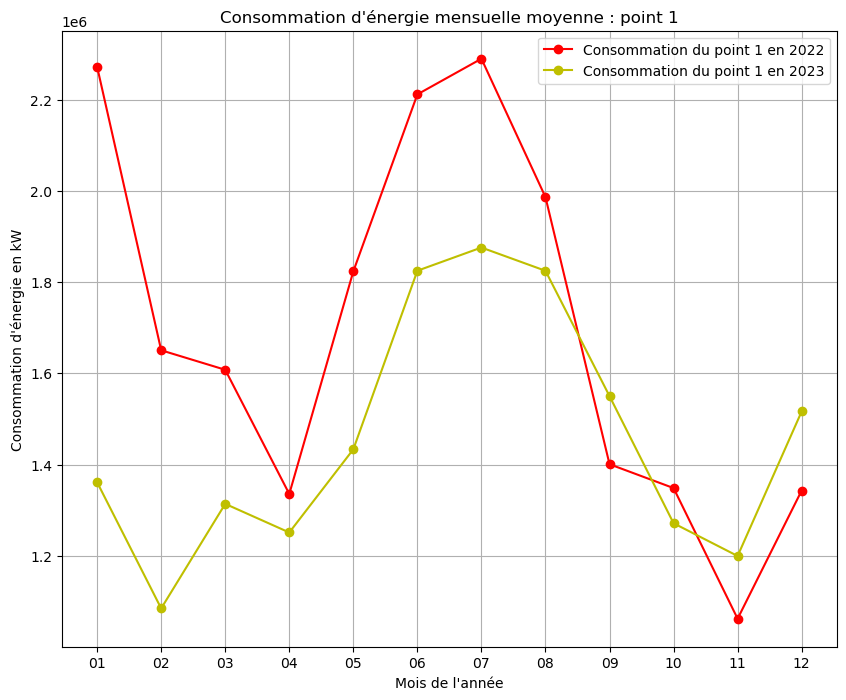

In [482]:
monthly_conso_report(conso22, conso23, 1)

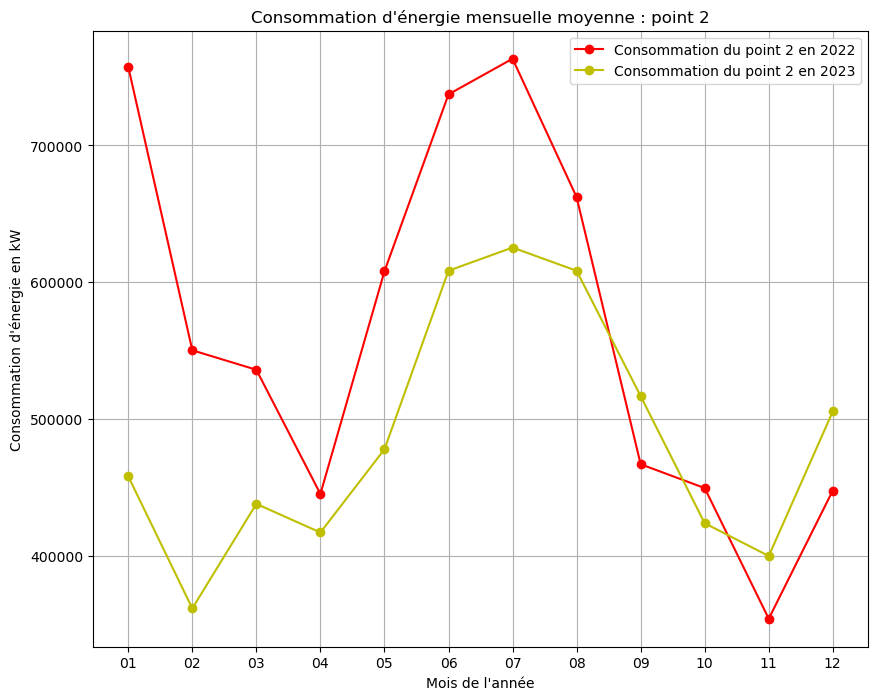

In [288]:
monthly_conso_report(conso22_2, conso23_2, 2)

<h4> Commentaires </h4>
La consommation mensuelle est la somme des consommations journalières du mois considéré. <br>
En rouge, nous avons les consommations mensuelles en 2022 et en jaune celle de 2023. <br>
En abscisse sont representes les mois de l'année et en ordonnées les valeurs relevées en kW. La consommation du point 1 est representee <b>à l'échelle 1 pour 1 million.</b> <br>

<br><u> Observations </u> <br>
* En comparant les points 1 et 2, on constate que les tendances sont similaires au cours de l'annee. Toutefois, le point 1 dont le minimum est  1061676.0 pour 2022 et 1084272.0 pour 2023, consomme plus que le point 2 dont le maximum est 2290292.4 pour 2022 et 1876045.6 pour 2023
* Globalement, pour les points 1 et 2, les consommations en 2022 sont plus importantes que celles de 2023 exceptés pendant les mois de Septembre, Novembre et Décembre où les relévés de 2023 depassent ceux de 2022. 
* De plus, on observe deux périodes de grande consommation annuelles pour les deux points : 
  - de Juin à Août avec un pic en Juillet
  - au cours du mois de Janvier

<u> <br>Interpretation:</u> <br>
* Les pics de consommations annuels pour les deux points sont repérés dans les saisions les plus extrêmes (été et hiver). Ce qui correspondrait à l'utilisation du chauffage en hiver et des systemes de refroidissement en été (Juin à Aout)

* La différence de consommation entre l'année 2022 et 2023 s'expliquerait par l'application de métjodes visant à minimiser la consommation d'énergie.


 <h3> 2.	Analyse de l'évolution des consommations de nuit sur le mois de janvier 2023. Une nuit est composée des consommations du jour J de 22h à 00h et des consommations du jour J+1 de 00h à 06h. </h3>

In [486]:
def nuits_de_Janvier(data:pd.DataFrame):
    # 1- Récupérer les lignes qui sont des horaires de nuit entre 22h et 6h
    jan = data[data['month'] == '01'][['time', 'day','heure','value']]
    jan = jan[((jan['time'].dt.hour >= 22) | (jan['time'].dt.hour < 6) | \
              ((jan['time'].dt.hour == 6) & (jan['time'].dt.minute == 0) ))]
    
    # 2- Marquer chaque horaire d'un numéro de nuit. Pour que la nuit soit effectivement de 22h à 6h
   
    
    #    La colonne 'day' est une chaîne de caractère au format 'yyyy-mm-dd' il faut non seulement extraire 
    #    le jour mais aussi s'assurer qu'on a une valeur entière pour pouvoir la modifier facilement
    jan['night number'] = jan['time'].dt.day
    
    #    Trouvons les horaires qui vont être renvoyés au jour suivant
    condition = data['time'].dt.hour >= 22
   
    #    Affecter ces horaires au lendemain
    jan.loc[condition, 'night number'] += 1
    
    
    #    Garder la somme des valeurs de la nuit
    jan = jan.groupby('night number',as_index = False)['value'].sum()
    
    # Supprimer la 31ème nuit qui est attribuée au mois de Février
    jan = jan.loc[:30]
    
    return jan

In [406]:
def line_plot(data: pd.DataFrame,  x, columnX:str='night number', columnY:str='value'):
    
    # Définition de la taille de la figure
    plt.figure(figsize = (12,8))
    
    # Tracer le graphe de consommation avec des marqueurs jaunes
    plt.plot(data[columnX], data[columnY],'yo-', label='Consommation nocturne')
    
    # Ajout du titre du graphe et des libelés des axes X et Y
    plt.title('Evolution de la consommation sur les nuits de Janvier 2023 point '+ str(x))
    plt.xlabel('Nuits')
    plt.ylabel('Consommation d\'énergie en kW')
    
    # Ajout de la légende
    plt.legend()
    plt.grid(True)
    
    # Sauvegarde du graphe
    plt.savefig('point'+str(x)+'jan.png')
    
    # Afficher le graphe
    plt.show()

Point de consommation 1

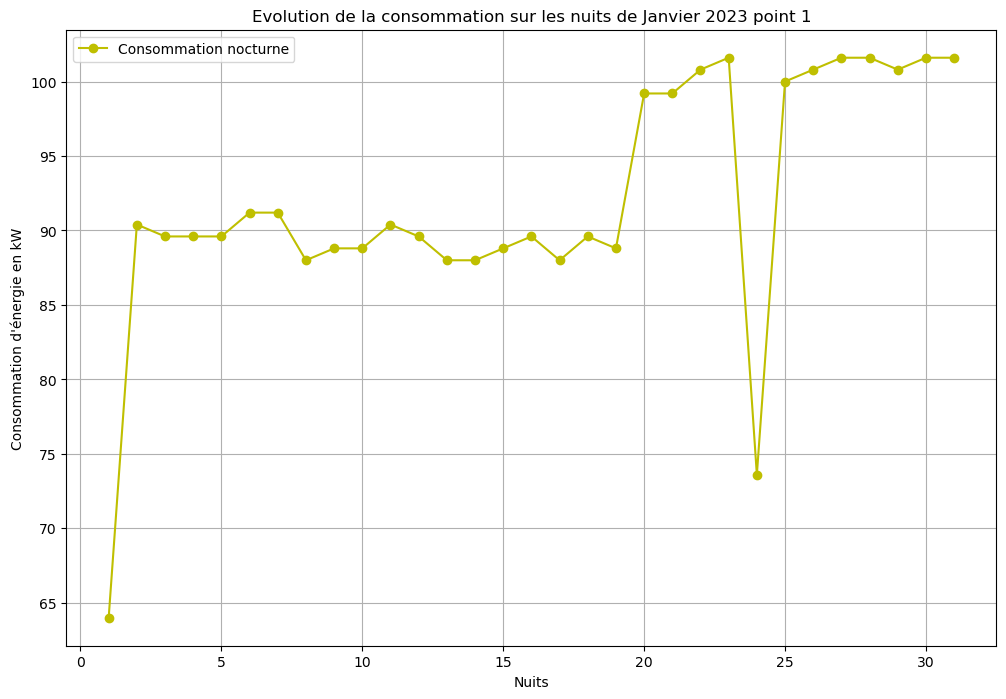

In [407]:
line_plot(nuits_de_Janvier(conso23), '1')

Point de consommation 2

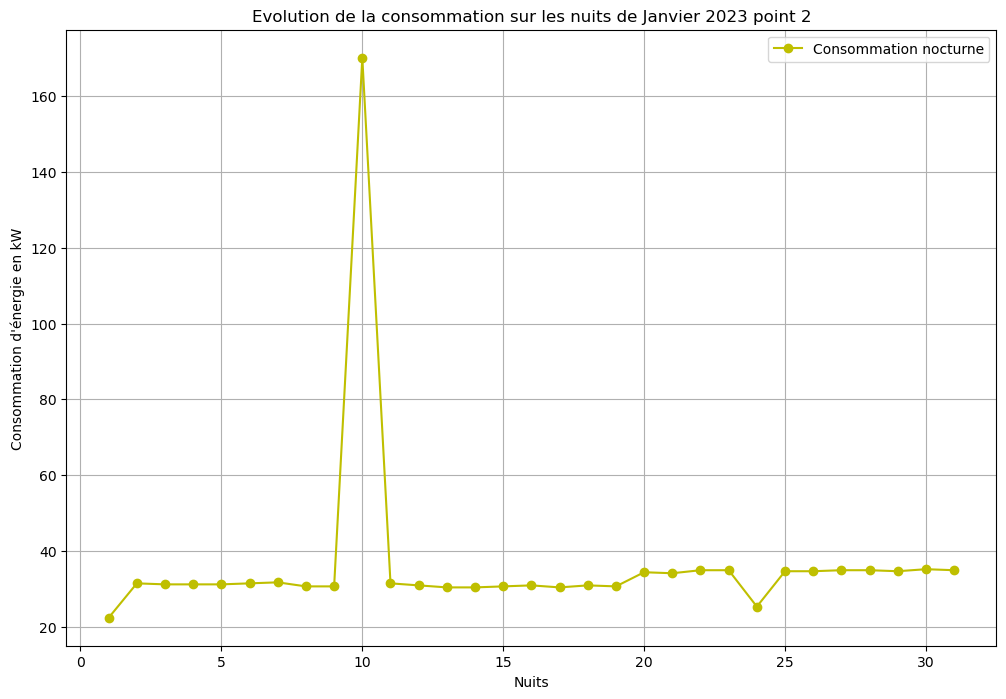

In [408]:
line_plot(nuits_de_Janvier(conso23_2), '2')

Ces graphes représentent les consommations nocturnes d'énergie dans les points 1 et 2 en kW au cours du mois de Janvier 2023. <br> Sur l'axe des abscisses, les jours correspondant sont représentés. Tandis que sur l'axe des ordonnées sont représentées.<br> La consommation du 1er JAnvier correspond à celle de minuit à 06h (6:00:00 inclus). Celle du 31 Janvier part du 30 à 22h au 31 à (6:00:00 inclus).<br> <br>
<u>Observations</u>
<br> Le consommation minimale d'énergie est celle du 1er Janvier dans les deux points, suivie du 24 Janvier. Toutefois les maximas ne correpondent pas aux mêmes jours. 
La nuit du 9 au 10 Janvier la consommation atteint le pic du mois<br><br>
<u> Interprétation </u>
<br>La consommation du 1er janvier est le minimum du mois enterme de consommation parce que les calculs n'incluaient pas la consommation du 31 decembre 2022.

<h3> 3.	Mise en évidence des différents profils de consommation hebdomadaire sur le mois de février 2023. Un profil de consommation reflète les habitudes de consommation d'un site. </h3>

In [439]:
fev23 = conso23[['time','value','month']]
fev23 = fev23[fev23['month'] == '02']
fev23['week'] = (fev23['time'].dt.day - 1) // 7 + 1
fevweek = fev23.groupby('week', as_index = False)['value'].sum()

fev23_2 = conso23_2[['time','value','month']]
fev23_2 = fev23_2[fev23_2['month'] == '02']
fev23_2['week'] = (fev23_2['time'].dt.day - 1) // 7 + 1
fevweek_2 = fev23_2.groupby('week', as_index = False)['value'].sum()

In [488]:
def plot_week():
    
    # Récupération des données de la colonne 'week' pour l'axe des abscisses
    x = fevweek['week']
    
    # Définition de la largeur des bandes
    bar_width = 0.35
    
    # Choix des positions des barres sur le graphe
    bar_positions1 = [i - bar_width/2 for i in x]  # Décalage à gauche pour le point 1
    bar_positions2 = [i + bar_width/2 for i in x]  # Décalage à gauche pour le point 2
    
    # Ajout des bandes aux positions choisies
    plt.bar(bar_positions1, fevweek['value'], width=bar_width, label='point de prélèvement 1')
    plt.bar(bar_positions2, fevweek_2['value'], width=bar_width, label='point de prélèvement 2')
    
    # Titre des axes
    plt.xlabel('Semaines')
    plt.ylabel('Conommation énergétique hebdomadaire')
    
    # Titre du graphique
    plt.title('Profil de consommation énergétique sur le mois de février 2023')
    
    # Spécifier le format de l'axe des abscisses (x) en entiers
    plt.xticks(x, [int(i) for i in x])
    
    # Légende 
    plt.legend()
    
    # Activation de la grille
    plt.grid(True)
    plt.savefig('Profil de Consommation.png')
    plt.show()

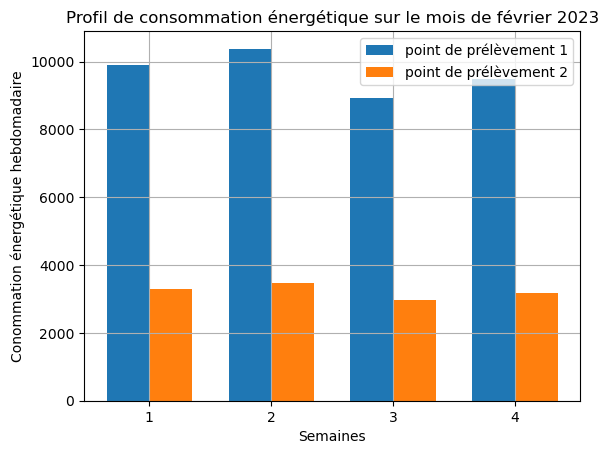

In [484]:
plot_week()

Chaque semaine est un ensemble de sept jours. <br>Par exemple, la première semaine commence le premier jour de février et se termine le 7e. <br>Chaque 7 jours consitituent une semaine, indépendamment du découpage hebdomadaire de l'année. <br><br>
En abscisse les semaines du mois de février, En ordonnées les onsommations hebdomadaires en kW
<br><br><u>Observations</u><br>
* Les mesures du point 1 sont globalement plus élevées que celles du point 2.
* La consommation maximale (10000 pour le point 1 et 3600 pour le point 2) est enregistrée pendant la deuxième semaine du mois.
* On observe une baisse pendant la troisième semaine qui est alors la plus basse consommation.